<a href="https://colab.research.google.com/github/DajeanArcila/biblioteca_pandas/blob/main/Series%20Temporais%20-%20SARIMAX%20com%20Vari%C3%A1veis%20Ex%C3%B3genas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Series Temporais - SARIMAX com Variáveis Exógenas
dataset con acciones de apple


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset= pd.read_csv('price.csv')

In [3]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-10-01,3.997143,4.012857,3.835357,3.897143,3.327505,1296484000
1,2008-10-02,3.857500,3.885357,3.571429,3.575000,3.052449,1609364400
2,2008-10-03,3.714286,3.803571,3.380357,3.466786,2.960053,2294398400
3,2008-10-06,3.284286,3.527857,3.126429,3.505000,2.992681,2107417200
4,2008-10-07,3.588571,3.625000,3.176786,3.184286,2.718845,1878772000


In [4]:
#tirar a media entre o maior e o menor valor das acoes
dataset["Mean"] = (dataset["Low"] + dataset["High"])/2
dataset.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Mean
0,2008-10-01,3.997143,4.012857,3.835357,3.897143,3.327505,1296484000,3.924107
1,2008-10-02,3.857500,3.885357,3.571429,3.575000,3.052449,1609364400,3.728393


a funñao step ira fazer cada valor da media ser introduzido uma linha acina da nova columna chamada'actual'

In [5]:
steps=-1
dataset_for_prediction= dataset.copy()
dataset_for_prediction["Actual"]=dataset_for_prediction["Mean"].shift(steps)
dataset_for_prediction.head(3)
#esta acao pega o valos do dia siguente e coloca no dia 'atual'

,Date,Open,High,Low,Close,Adj Close,Volume,Mean,Actual
0,2008-10-01,3.997143,4.012857,3.835357,3.897143,3.327505,1296484000,3.924107,3.728393
1,2008-10-02,3.857500,3.885357,3.571429,3.575000,3.052449,1609364400,3.728393,3.591964
2,2008-10-03,3.714286,3.803571,3.380357,3.466786,2.960053,2294398400,3.591964,3.327143


In [6]:
dataset_for_prediction=dataset_for_prediction.dropna()

In [7]:
dataset_for_prediction['Date']=pd.to_datetime(dataset_for_prediction['Date'])
dataset_for_prediction.index=dataset_for_prediction['Date']

<Axes: xlabel='Date'>

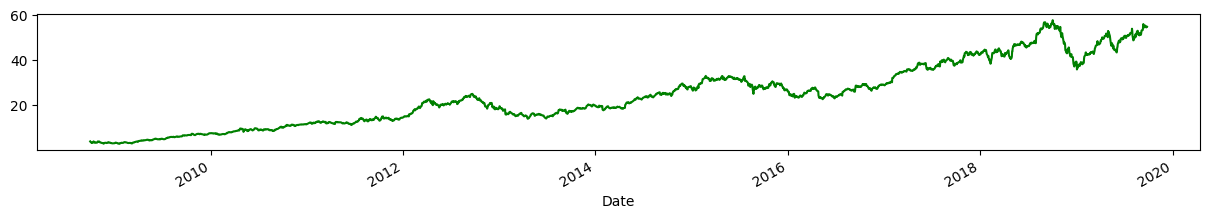

In [8]:
dataset_for_prediction['Mean'].plot(color='green',figsize=(15,2))
#aqui podemos ver que las acciones al pasar de los años, el numero'promedio' de valor fue aumentando poco a poco

Text(0.5, 1.0, 'Apple Stock Volume')

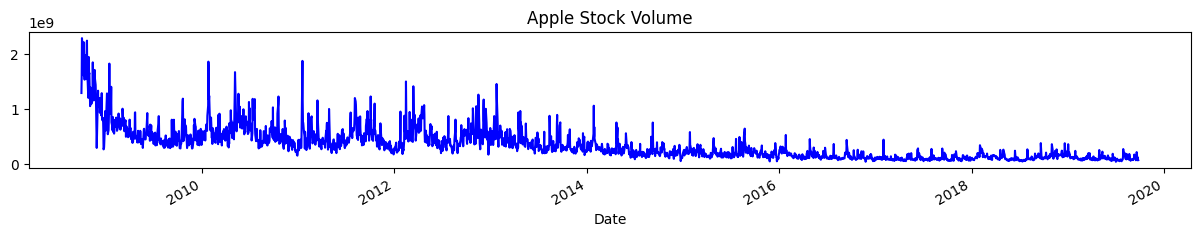

In [9]:
dataset_for_prediction["Volume"].plot(color="blue", figsize=(15,2))
plt.title("Apple Stock Volume")
#vemos el volumen de ventas

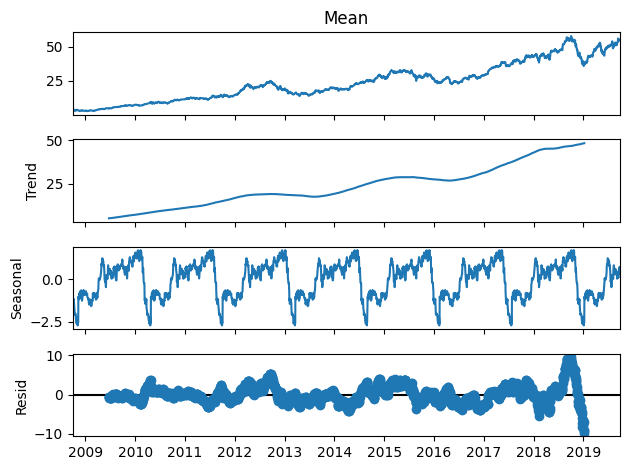

In [10]:
import statsmodels.api as sm
sd= sm.tsa.seasonal_decompose(dataset_for_prediction['Mean'], model='add',period=365)
fig=sd.plot()
plt.show(3,3)

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc_in= MinMaxScaler(feature_range= (0,1))
scaled_input=sc_in.fit_transform(dataset_for_prediction[['Low','High','Open','Close','Adj Close','Volume','Mean']])
scaled_input=pd.DataFrame(scaled_input)
X=scaled_input

In [13]:
sc_in= MinMaxScaler(feature_range= (0,1))
scaled_output=sc_in.fit_transform(dataset_for_prediction[['Actual']])
scaled_output=pd.DataFrame(scaled_output)
Y=scaled_output

aqui definimos nuestra variables que de 'causa' o las que haran que nuestra target mude y despues definimos nuestro output o target

In [24]:
X.rename(columns={0:'Low',1:'High',2:'Open',3:'Close',4:'Adj Close',5:'Volume',6:'Mean'},inplace=True)
X.index = dataset_for_prediction.index
X.head(2)

,Low,High,Open,Close,Adj Close,Volume,Mean
Date,,,,,,,
2008-10-01,0.019075,0.019558,0.021177,0.019996,0.01762,0.556275,0.019318
2008-10-02,0.014246,0.017258,0.018632,0.014163,0.01248,0.695398,0.015763


In [23]:
Y.rename(columns={0:"Stock Price next day"}, inplace= True)
Y.index=dataset_for_prediction.index
Y.head(2)

,Stock Price next day
Date,
2008-10-01,0.015763
2008-10-02,0.013284
